# Challenge Set 1:  MTA Turnstile Data

In [5]:
from __future__ import print_function, division

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
import datetime

#### Challenge 1

In [8]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df = get_data(week_nums)

In [9]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [10]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [11]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [12]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [13]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [14]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
192873,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,05:00:00,REGULAR,5554,271
192874,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,09:00:00,REGULAR,5554,271
192875,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,13:00:00,REGULAR,5554,271
192876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,17:00:00,REGULAR,5554,271
192877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,21:00:00,REGULAR,5554,271


In [15]:
# Three weeks of Data
turnstiles_df.DATE.value_counts().sort_index()

08/27/2016    27290
08/28/2016    27300
08/29/2016    27828
08/30/2016    27775
08/31/2016    27352
09/01/2016    28116
09/02/2016    27478
09/03/2016    27353
09/04/2016    27304
09/05/2016    27325
09/06/2016    28826
09/07/2016    27977
09/08/2016    28137
09/09/2016    27956
09/10/2016    27325
09/11/2016    27334
09/12/2016    28074
09/13/2016    27343
09/14/2016    27359
09/15/2016    27283
09/16/2016    28160
Name: DATE, dtype: int64

### Andre's Original Functions for Challenge 1

In [16]:
# sept162017 = pd.read_csv("turnstile_170916.txt")
# sept92017 = pd.read_csv("turnstile_170909.txt")
# sept22017 = pd.read_csv("turnstile_170902.txt")
# aug262017 = pd.read_csv("turnstile_170826.txt")

# aug26_sept16 = pd.concat([sept162017, sept92017, sept22017, aug262017])
# aug26_sept16['DATETIME'] = aug26_sept16['DATE'] + " " + aug26_sept16['TIME']

# aug26_sept16['DATETIME'] = pd.to_datetime(aug26_sept16['DATETIME'], format="%m/%d/%Y %H:%M:%S")

# aug26_sept16['LOCATION'] = tuple((zip(aug26_sept16['C/A'], aug26_sept16.UNIT, aug26_sept16.SCP, aug26_sept16.STATION)))

# d = defaultdict(list)
# for i, location in enumerate(aug26_sept16.LOCATION):
#     d[location].append(list(aug26_sept16.iloc[i, pd.np.r_[4:6, 8:11, 12]]))
    


#### Challenge 2

In [17]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [18]:
from datetime import datetime as dt

In [19]:
mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [20]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [21]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
186607,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,00:00:00,REGULAR,12079591,2684445,2016-08-27 00:00:00
186608,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,04:00:00,REGULAR,12079636,2684479,2016-08-27 04:00:00
186609,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,08:00:00,REGULAR,12079894,2684489,2016-08-27 08:00:00
186610,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,12:00:00,REGULAR,12080369,2684533,2016-08-27 12:00:00
186611,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,16:00:00,REGULAR,12080831,2684606,2016-08-27 16:00:00


In [22]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
513722,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 08:00:00,2
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387264,R155,R116,01-00-03,50 ST,2016-09-15 20:00:00,1
387259,R155,R116,01-00-03,50 ST,2016-09-15 00:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1


In [23]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "R504") & 
(turnstiles_df["UNIT"] == "R276") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "VERNON-JACKSON") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 9, 16).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
170562,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,00:00:00,REGULAR,8137913,1333972,2016-09-16 00:00:00
170563,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,04:00:00,REGULAR,8137913,1333975,2016-09-16 04:00:00
170564,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,REGULAR,8138271,1334066,2016-09-16 08:00:00
170565,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,RECOVR AUD,8138271,16735026,2016-09-16 08:00:00
170566,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,12:00:00,REGULAR,8139437,1334196,2016-09-16 12:00:00


* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

In [24]:
turnstiles_df.DESC.value_counts()

REGULAR       579109
RECOVR AUD      1786
Name: DESC, dtype: int64

* Since we are only interested in Entries, we might be OK.

In [25]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

**TA COMMENT:**

Good catch on discovering that the RECOVR AUD entries exists. However, I believe that by just doing a drop_duplicates you won't remove the AUD entries unless the REGULAR and AUD entries have the exact same DATE_TIME (which in this case happens to be on 09/16/2016.

In [26]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387266,R155,R116,01-00-03,50 ST,2016-09-16 04:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1
387261,R155,R116,01-00-03,50 ST,2016-09-15 08:00:00,1
387262,R155,R116,01-00-03,50 ST,2016-09-15 12:00:00,1


* No more duplicate Entries

In [27]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

### Andre's Original Functions for Challenge 2

In [28]:
# aug26_sept16['ENTRIES_COUNT'] = 0
# aug26_sept16['EXITS_COUNT'] = 0
# aug26_sept16['EXITS'] = aug26_sept16['EXITS                                                               ']

# del aug26_sept16['EXITS                                                               ']         

# aug26_sept16['ENTRIES_COUNT'] = aug26_sept16['ENTRIES'].shift(-1) - aug26_sept16['ENTRIES']
# aug26_sept16['EXITS_COUNT'] = aug26_sept16['EXITS'].shift(-1) - aug26_sept16['EXITS']

# aug26_sept16['TOTAL_TRAFFIC'] = aug26_sept16['ENTRIES_COUNT'] + aug26_sept16['EXITS_COUNT'] 

# aug26_sept16 = aug26_sept16[aug26_sept16['ENTRIES_COUNT'] < 3000]
# aug26_sept16 = aug26_sept16[aug26_sept16['ENTRIES_COUNT'] > 0]

# aug26_sept16 = aug26_sept16[aug26_sept16['EXITS_COUNT'] < 3000]
# aug26_sept16 = aug26_sept16[aug26_sept16['EXITS_COUNT'] > 0]

# aug26_sept16['DAY'] = aug26_sept16['DATE'].dt.weekday_name

# aug26_sept16['DATE'] = pd.to_datetime(aug26_sept16['DATE'], format="%m/%d/%Y")

#### Challenge 3

In [29]:
turnstiles_daily = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.first().reset_index()

In [30]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383


In [31]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [32]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0


In [33]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
95997,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/12/2016,5554,09/11/2016,5554.0
95998,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/13/2016,5554,09/12/2016,5554.0
95999,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/14/2016,5554,09/13/2016,5554.0
96000,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/15/2016,5554,09/14/2016,5554.0
96001,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2016,5554,09/15/2016,5554.0


In [34]:
# Drop the rows for last date
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [35]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
715,A011,R080,01-00-00,57 ST-7 AV,08/28/2016,887688133,08/27/2016,887689608.0
716,A011,R080,01-00-00,57 ST-7 AV,08/29/2016,887685714,08/28/2016,887688133.0
717,A011,R080,01-00-00,57 ST-7 AV,08/30/2016,887683207,08/29/2016,887685714.0
718,A011,R080,01-00-00,57 ST-7 AV,08/31/2016,887680260,08/30/2016,887683207.0
719,A011,R080,01-00-00,57 ST-7 AV,09/01/2016,887677354,08/31/2016,887680260.0


In [36]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 8, 27).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1446,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,20:00:00,887689608,2016-08-27 20:00:00
1445,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,16:00:00,887690085,2016-08-27 16:00:00
1444,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,12:00:00,887690472,2016-08-27 12:00:00
1443,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,08:00:00,887690738,2016-08-27 08:00:00
1442,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,04:00:00,887690800,2016-08-27 04:00:00


In [37]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size());

In [38]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000);

194 1894869683.0
262183 67111299.0
63 1054429.0
2862 2044694.0
1912607049 7509132.0
285 1494569141.0
2542 14129479.0
67108864 0.0
335600216 1374824.0
36 3252790.0
1117 3665497.0
262269 10823938.0
1452 1460387.0
1154413610 8957775.0
100665773 35655801.0
1443 1014193.0
186916568 604712476.0
874 6130902.0
598 11078528.0
1160 74672293.0
0 117440532.0
100663296 1299.0
117440514 100663296.0
2123 9170483.0
428 2336204.0
1024 12498870.0


In [39]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000);

194 1894869683.0
262183 67111299.0
63 1054429.0
2862 2044694.0
1912607049 7509132.0
285 1494569141.0
2542 14129479.0
67108864 0.0
335600216 1374824.0
36 3252790.0
1117 3665497.0
262269 10823938.0
1452 1460387.0
1154413610 8957775.0
100665773 35655801.0
1443 1014193.0
186916568 604712476.0
874 6130902.0
598 11078528.0
1160 74672293.0
0 117440532.0
100663296 1299.0
117440514 100663296.0
2123 9170483.0
428 2336204.0
1024 12498870.0


In [40]:
turnstiles_daily['DATE'] = pd.to_datetime(turnstiles_daily['DATE'], format="%m/%d/%Y")

In [41]:
turnstiles_daily['DAY'] = turnstiles_daily['DATE'].dt.weekday_name

In [42]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY
1,A002,R051,02-00-00,59 ST,2016-08-28,5800798,08/27/2016,5800121.0,677.0,Sunday
2,A002,R051,02-00-00,59 ST,2016-08-29,5802336,08/28/2016,5800798.0,1538.0,Monday
3,A002,R051,02-00-00,59 ST,2016-08-30,5803875,08/29/2016,5802336.0,1539.0,Tuesday
4,A002,R051,02-00-00,59 ST,2016-08-31,5805383,08/30/2016,5803875.0,1508.0,Wednesday
5,A002,R051,02-00-00,59 ST,2016-09-01,5806990,08/31/2016,5805383.0,1607.0,Thursday


In [43]:
turnstiles_daily['DATE'].dtype

dtype('<M8[ns]')

### Andre's Original Functions for Challenge 3

In [44]:
# gb = aug26_sept16.groupby(['LOCATION','DATE']).sum()
# gb.reset_index()
# del gb['ENTRIES']
# del gb['EXITS']
# gb.reset_index()


# series_for_loc = {}
# for location in aug26_sept16.LOCATION.unique():
#     f = gb.loc[location]
#     series_for_loc[location] = list(zip(f.index, f.ENTRIES_COUNT))
    
# ST59 = series_for_loc[('A002', 'R051', '02-00-00', '59 ST')]

# aug26_sept16_gb = aug26_sept16.groupby(['STATION','C/A', 'UNIT', 'SCP', 'DATE', 'TIME', 'DAY', 'LOCATION']).ENTRIES_COUNT.agg(['sum']).reset_index()
# aug26_sept16_gb.head()

# AV1 = aug26_sept16_gb[(aug26_sept16_gb['LOCATION'] == ('H007', 'R248', '00-00-00', '1 AV'))]
# AV1.head()

#### Challenge 4

In [45]:
mask = ((turnstiles_daily["C/A"] == "A002") & 
(turnstiles_daily["UNIT"] == "R051") & 
(turnstiles_daily["SCP"] == "02-00-00") & 
(turnstiles_daily["STATION"] == "59 ST"))
ST59 = turnstiles_daily[mask]
ST59.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY
16,A002,R051,02-00-00,59 ST,2016-09-12,5820548,09/11/2016,5818974.0,1574.0,Monday
17,A002,R051,02-00-00,59 ST,2016-09-13,5822272,09/12/2016,5820548.0,1724.0,Tuesday
18,A002,R051,02-00-00,59 ST,2016-09-14,5824032,09/13/2016,5822272.0,1760.0,Wednesday
19,A002,R051,02-00-00,59 ST,2016-09-15,5825807,09/14/2016,5824032.0,1775.0,Thursday
20,A002,R051,02-00-00,59 ST,2016-09-16,5827597,09/15/2016,5825807.0,1790.0,Friday


C:\Users\aj282\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


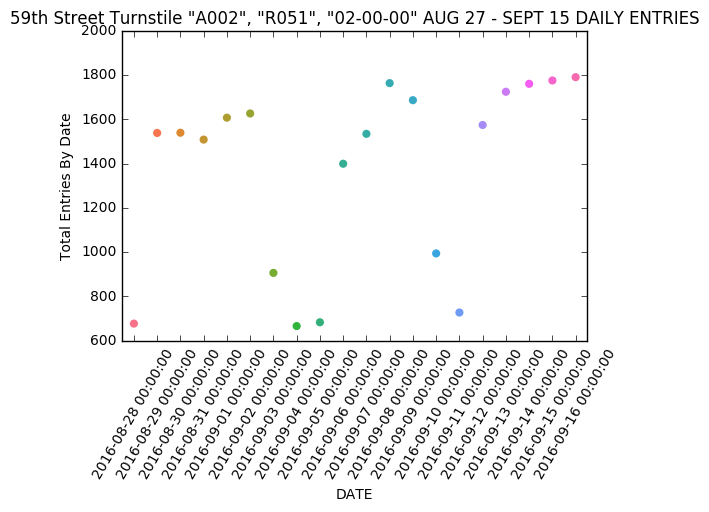

In [46]:
ax = plt.axes()
g = sns.pointplot(x='DATE', y='DAILY_ENTRIES', data=ST59, palette="husl", join=True)
ax.set_title('59th Street Turnstile "A002", "R051", "02-00-00" AUG 27 - SEPT 15 DAILY ENTRIES')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Total Entries By Date')
g.set_xticklabels(labels = ST59['DATE'], rotation=60, fontsize=10)
# for i in len(AV1):
#     if i%5 == 0: g.set(xticklabels=[])
plt.show()

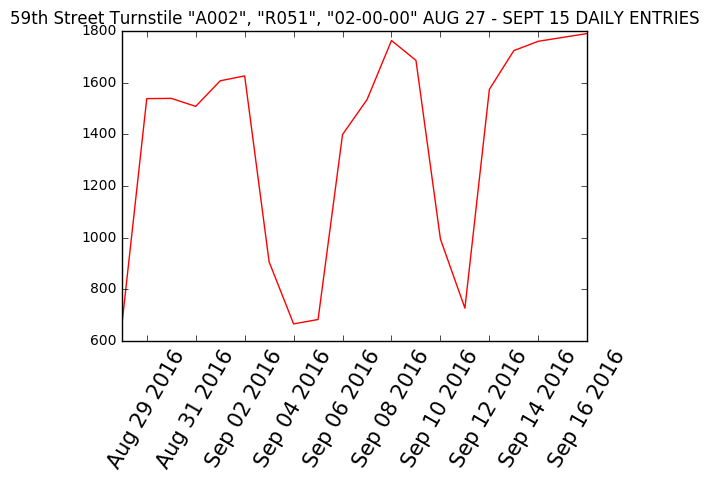

In [47]:
plt.plot(ST59['DATE'], ST59['DAILY_ENTRIES'], 'r');
plt.title('59th Street Turnstile "A002", "R051", "02-00-00" AUG 27 - SEPT 15 DAILY ENTRIES')
plt.xticks(rotation=60, fontsize=15);

#### Challenge 5

In [48]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAY
1,A002,R051,02-00-00,59 ST,2016-08-28,5800798,08/27/2016,5800121.0,677.0,Sunday
2,A002,R051,02-00-00,59 ST,2016-08-29,5802336,08/28/2016,5800798.0,1538.0,Monday
3,A002,R051,02-00-00,59 ST,2016-08-30,5803875,08/29/2016,5802336.0,1539.0,Tuesday
4,A002,R051,02-00-00,59 ST,2016-08-31,5805383,08/30/2016,5803875.0,1508.0,Wednesday
5,A002,R051,02-00-00,59 ST,2016-09-01,5806990,08/31/2016,5805383.0,1607.0,Thursday


In [49]:
turnstile_comb = (turnstiles_daily.groupby(['C/A', 'UNIT', 'STATION', 'DATE'])).DAILY_ENTRIES.agg(['sum']).reset_index()

turnstile_comb.head()

,C/A,UNIT,STATION,DATE,sum
0,A002,R051,59 ST,2016-08-28,7896.0
1,A002,R051,59 ST,2016-08-29,15462.0
2,A002,R051,59 ST,2016-08-30,16622.0
3,A002,R051,59 ST,2016-08-31,16557.0
4,A002,R051,59 ST,2016-09-01,16464.0


#### Challenge 6

In [50]:
turnstile_station = (turnstiles_daily.groupby(['STATION', 'DATE', 'DAY'])).DAILY_ENTRIES.agg(['sum']).reset_index()

turnstile_station.head()

,STATION,DATE,DAY,sum
0,1 AV,2016-08-28,Sunday,13871.0
1,1 AV,2016-08-29,Monday,18064.0
2,1 AV,2016-08-30,Tuesday,19182.0
3,1 AV,2016-08-31,Wednesday,19616.0
4,1 AV,2016-09-01,Thursday,20170.0


In [51]:
AV1 = turnstile_station[turnstile_station['STATION'] == '1 AV']
AV1.head()

,STATION,DATE,DAY,sum
0,1 AV,2016-08-28,Sunday,13871.0
1,1 AV,2016-08-29,Monday,18064.0
2,1 AV,2016-08-30,Tuesday,19182.0
3,1 AV,2016-08-31,Wednesday,19616.0
4,1 AV,2016-09-01,Thursday,20170.0


#### Challenge 7

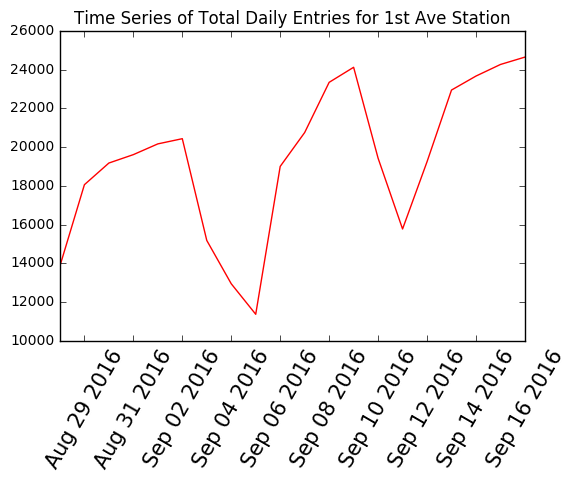

In [52]:
plt.plot(AV1['DATE'], AV1['sum'], 'r');
plt.title("Time Series of Total Daily Entries for 1st Ave Station")
plt.xticks(rotation=60, fontsize=15);

#### Challenge 8

In [53]:
turnstile_station['WEEK'] = 0
turnstile_station.head()

,STATION,DATE,DAY,sum,WEEK
0,1 AV,2016-08-28,Sunday,13871.0,0
1,1 AV,2016-08-29,Monday,18064.0,0
2,1 AV,2016-08-30,Tuesday,19182.0,0
3,1 AV,2016-08-31,Wednesday,19616.0,0
4,1 AV,2016-09-01,Thursday,20170.0,0


In [55]:
# week = 1
# l = 0
# for j in range(int(len(turnstile_station)/7)):
#     for i in range(7):
#         k = (i + l)
#         turnstile_station['WEEK'].loc[k] = week
#     l += 7    
#     week += 1

In [56]:
# turnstile_station["WEEK"] = turnstile_station["WEEK"].astype('category')

In [57]:
AV1 = turnstile_station[turnstile_station["STATION"]=='1 AV']

In [58]:
week = 1
l = 0
for j in range(int(len(AV1)/7)):
    for i in range(7):
        k = (i + l)
        AV1['WEEK'].loc[k] = week
    l += 7    
    week += 1

C:\Users\aj282\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\aj282\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


**TA COMMENT:**

Pandas has a built-in method to get the week number of a given date. An example code would be: df['DATE_TIME'].dt.week

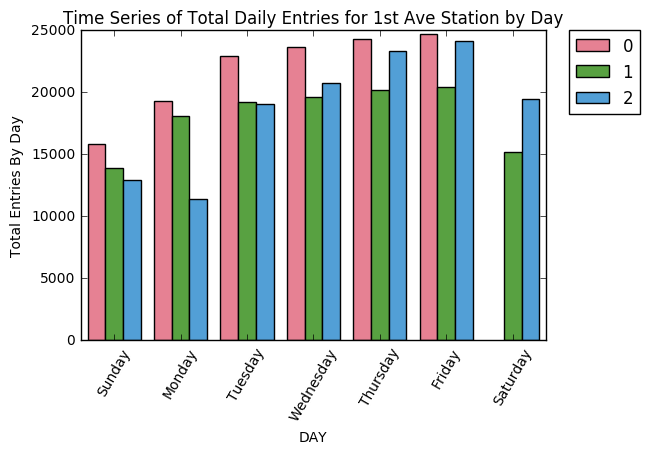

In [60]:
ax = plt.axes()
g = sns.barplot(x='DAY', y='sum', hue='WEEK', data=AV1, palette="husl")
ax.set_title('Time Series of Total Daily Entries for 1st Ave Station by Day')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Total Entries By Day')
g.set_xticklabels(labels = AV1['DAY'], rotation=60, fontsize=10)
plt.show()

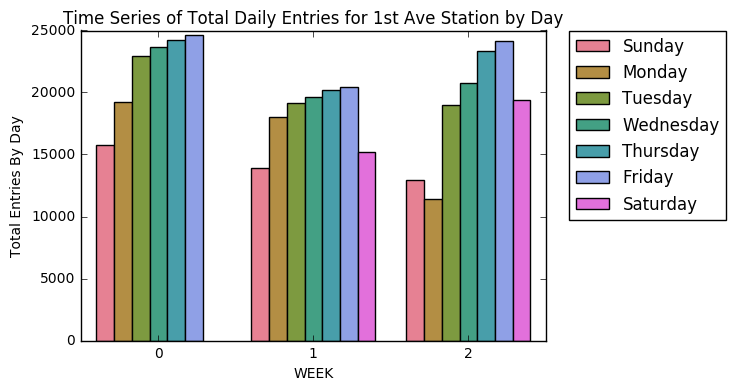

In [62]:
ax = plt.axes()
g = sns.barplot(x='WEEK', y='sum', hue='DAY', data=AV1, palette="husl")
ax.set_title('Time Series of Total Daily Entries for 1st Ave Station by Day')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Total Entries By Day')
# g.set_xticklabels(labels = AV1['WEEK'], rotation=60, fontsize=10)
plt.show()

#### Challenge 9

In [79]:
turnstile_station_comb = (turnstile_station.groupby(['STATION'])).sum().reset_index()
del turnstile_station_comb['WEEK']
turnstile_station_comb = turnstile_station_comb.sort_values(['sum'], ascending=False)
turnstile_station_top10 = turnstile_station_comb.head(10)
turnstile_station_top10

,STATION,sum
61,34 ST-PENN STA,2874102.0
230,GRD CNTRL-42 ST,2477058.0
59,34 ST-HERALD SQ,2069243.0
46,23 ST,2054576.0
170,CANAL ST,1947344.0
14,14 ST-UNION SQ,1829280.0
109,86 ST,1791884.0
68,42 ST-PORT AUTH,1761587.0
348,TIMES SQ-42 ST,1700188.0
223,FULTON ST,1617214.0


In [88]:
turnstile_top10 = turnstile_station[turnstile_station['STATION'].isin(turnstile_station_top10['STATION'])]

In [119]:

#del turnstile_top10['DAY']
#del turnstile_top10['WEEK']
turnstile_top10.sort_values('sum', ascending=False).head()

,STATION,DATE,sum
3410,CANAL ST,2016-09-07,774392.0
1237,34 ST-PENN STA,2016-09-14,183298.0
1238,34 ST-PENN STA,2016-09-15,180683.0
1236,34 ST-PENN STA,2016-09-13,179509.0
1231,34 ST-PENN STA,2016-09-08,179000.0


In [141]:
top10 = turnstile_top10.sort_values('sum', ascending=False)

In [143]:
top10B = top10.drop(top10.index[0])

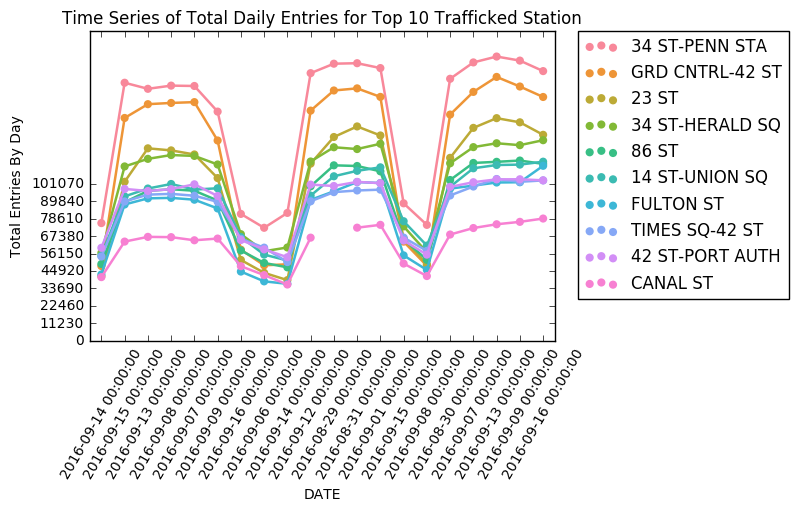

In [148]:
ax = plt.axes()
g = sns.pointplot(data=top10B, x='DATE', hue='STATION', y='sum')
plt.yticks(np.linspace(0, 101070, num=10))
ax.set_title('Time Series of Total Daily Entries for Top 10 Trafficked Station')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Total Entries By Day')
g.set_xticklabels(labels = top10B['DATE'], rotation=60, fontsize=10)
plt.show()

**TA COMMENT:**

The y-labels seem off for this plot; they don't match up with the actual data points on the plot. The x-labels also seem off since the dates are not in order.

**TA COMMENT:**

Overall, good job on the challenge. There are specific comments that I left throughout the notebook so take a look at those. If you find yourself doing something complicated, such as labeling each date with the corresponding week number, try going through pandas documentation first or try searching through google/stackoverflow. Chances are the exact process you're trying to do has been implemented into pandas.